<a href="https://colab.research.google.com/github/manelbenabid/Lebanese-Arabizi-Tweet-Sentiment-Analysis/blob/main/Sentiment_Analysis_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
!pip install jupyterthemes

In [63]:
!pip install clean-text

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [65]:
df = pd.read_csv("https://raw.githubusercontent.com/manelbenabid/Lebanese-Arabizi-Tweet-Sentiment-Analysis/main/data/arabizi_tweets.csv")

In [66]:
df.head(10)

,tweet,sentiment,highlight
0,Aw enn l ahla men hek hay li btelbesle crop to...,Negative,None
1,yu2brnee jamelo pepe happy_face_smiley tfeh sh...,Negative,None
2,Lea ktir pedophile happy_face_smiley,Negative,Bullying
3,Shu hal hmar hayda,Negative,Bullying
4,Fasharet 3a ra2btak w ra2bit m3almak w ra2bit ...,Negative,None
5,Hayda ensen marid,Negative,None
6,my uncle is lowkey aawne w ktir aabele natfo,Negative,None
7,Bassam bte7lam feyon lal syesye bel leil as a ...,Negative,Sarcasm
8,@Ritarouhana helo ktir. Eza badkoun tejo kelko...,Negative,Sarcasm
9,Hayda ma biya3ref ye2ra w yektob w bedo wazire...,Negative,None


In [67]:
# convert sentiment to binary class [0,1]
df['class'] = df['sentiment'].map({'Positive': 1, 'Negative': 0})

In [68]:
df.tail(5)

,tweet,sentiment,highlight,class
1173,@ClementHakim helo el tafe2ol happy_face_smile...,Positive,None,1
1174,lah helo short hair,Positive,Courtesy words,1
1175,ya allah enta w batnak hahahaha,Positive,Joke,1
1176,-malla a7lam ya zalame -eh man sa2ile ktir - l...,Positive,Joke,1
1177,W yimkin chi nhar u3a mn l nom la2i hadi bel f...,Positive,Joke,1


array([[<Axes: title={'center': 'class'}>]], dtype=object)

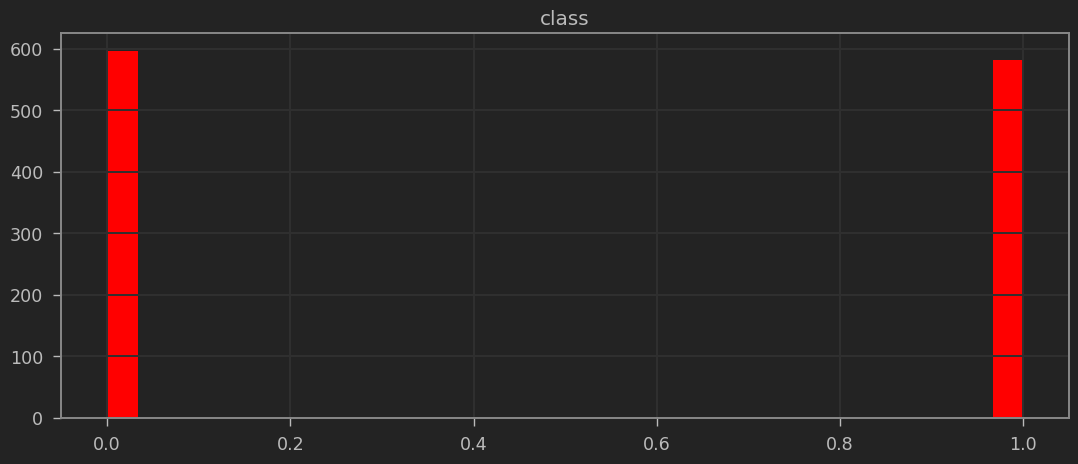

In [69]:
# Plot the histogram
df.hist(bins=30, figsize=(13,5), color='red')

In [70]:
df.sentiment.value_counts()

Negative    596
Positive    582
Name: sentiment, dtype: int64

<Axes: xlabel='class', ylabel='count'>

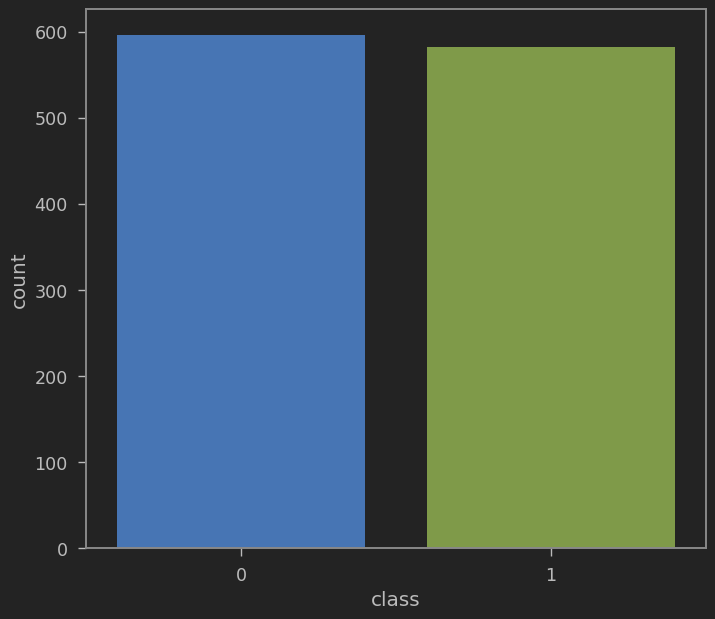

In [71]:
sns.countplot(df, x="class")

In [72]:
# Let's get the length of the messages
df['length'] = df['tweet'].apply(len)
df.head(10)

,tweet,sentiment,highlight,class,length
0,Aw enn l ahla men hek hay li btelbesle crop to...,Negative,None,0,135
1,yu2brnee jamelo pepe happy_face_smiley tfeh sh...,Negative,None,0,89
2,Lea ktir pedophile happy_face_smiley,Negative,Bullying,0,36
3,Shu hal hmar hayda,Negative,Bullying,0,18
4,Fasharet 3a ra2btak w ra2bit m3almak w ra2bit ...,Negative,None,0,58
5,Hayda ensen marid,Negative,None,0,17
6,my uncle is lowkey aawne w ktir aabele natfo,Negative,None,0,44
7,Bassam bte7lam feyon lal syesye bel leil as a ...,Negative,Sarcasm,0,74
8,@Ritarouhana helo ktir. Eza badkoun tejo kelko...,Negative,Sarcasm,0,154
9,Hayda ma biya3ref ye2ra w yektob w bedo wazire...,Negative,None,0,85


In [73]:
df.describe()

,class,length
count,1178.000000,1178.000000
mean,0.494058,68.928693
std,0.500177,47.071377
min,0.000000,4.000000
25%,0.000000,36.000000
50%,0.000000,60.000000
75%,1.000000,90.000000
max,1.000000,620.000000


In [74]:
# Let's view the shortest tweet
df[df['length'] == 4]['tweet']

1127    Atel
Name: tweet, dtype: object

# Data Preprocessing

1. convert to lower-case
1. remove punctuation, mentions, URLs, numbers, measurements, and timings
1. remove stop words

In [75]:
import re

def remove_tags_hashtags_url(tweet):
    # Remove hashtags (words starting with #)
    tweet = re.sub(r'#\w+', '', tweet)

    # Remove mentions (words starting with @)
    tweet = re.sub(r'@\w+', '', tweet)

    # Remove URLs (using a regular expression to match common URL patterns)
    tweet = re.sub(r'http[s]?://\S+', '', tweet)

    # Remove extra spaces and trim the tweet
    tweet = ' '.join(tweet.split())

    return tweet

In [76]:
tweet = df['tweet'][266]
print(tweet)
clean_tweet = remove_tags_hashtags_url(tweet)
print(clean_tweet)

Hahahhahaha albo melyen menna ðŸ¤£ https://www.facebook.com/723616625/posts/10156414568561626/
Hahahhahaha albo melyen menna ðŸ¤£


In [77]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [78]:
import nltk # Natural Language tool kit
nltk.download('stopwords')

# You have to download stopwords Package to execute this command
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [79]:
stopwords.words('french')

['au',
 'aux',
 'avec',
 'ce',
 'ces',
 'dans',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'et',
 'eux',
 'il',
 'ils',
 'je',
 'la',
 'le',
 'les',
 'leur',
 'lui',
 'ma',
 'mais',
 'me',
 'même',
 'mes',
 'moi',
 'mon',
 'ne',
 'nos',
 'notre',
 'nous',
 'on',
 'ou',
 'par',
 'pas',
 'pour',
 'qu',
 'que',
 'qui',
 'sa',
 'se',
 'ses',
 'son',
 'sur',
 'ta',
 'te',
 'tes',
 'toi',
 'ton',
 'tu',
 'un',
 'une',
 'vos',
 'votre',
 'vous',
 'c',
 'd',
 'j',
 'l',
 'à',
 'm',
 'n',
 's',
 't',
 'y',
 'été',
 'étée',
 'étées',
 'étés',
 'étant',
 'étante',
 'étants',
 'étantes',
 'suis',
 'es',
 'est',
 'sommes',
 'êtes',
 'sont',
 'serai',
 'seras',
 'sera',
 'serons',
 'serez',
 'seront',
 'serais',
 'serait',
 'serions',
 'seriez',
 'seraient',
 'étais',
 'était',
 'étions',
 'étiez',
 'étaient',
 'fus',
 'fut',
 'fûmes',
 'fûtes',
 'furent',
 'sois',
 'soit',
 'soyons',
 'soyez',
 'soient',
 'fusse',
 'fusses',
 'fût',
 'fussions',
 'fussiez',
 'fussent',
 'ayant',
 'ayante',
 'ayantes',


In [80]:
arabizi_stopwords = ['chu', 'chou', 'shu', 'shou', 'hal', 'fikeee', 'fike', 'eh', 'ma', '3a', '3am', '3an', '3ana', '3endon', '3m', 'aal', '3al','3ala','al', 'ana',
                 'b', 'bas', 'bass', 'bel', 'bi', 'chi', 'el', 'ele', 'enn', 'enno', 'eno', 'mch', 'mech', 'mish', '3layki', '3layon',
                 'enta', 'enteh','ente', 'eza', 'fi', 'fik', 'fina', 'fine', 'fiya', 'fiye', 'wlik', 'shi',
                 'hal', 'hayda', 'hek', 'inta', 'iza', 'kaza', 'kel', 'kente', 'kif',
                 'kint', 'kinte', 'l',  'la2na', 'lal', 'li', 'ma3', 'ma3a', 'ma3ak',
                 'ma3e', 'ma3ekk', 'ma3i', 'ma3ik', 'ma3ke', 'ma3na', 'ma3o', 'men', 'mn',
                 'n7na', 'tab', 'tayeb', 'w', 'aw', 'wlek', 'ya', 'ya3ne', 'yaane', 'yalla', 'yala', 'yalle',
                     'bl', 'hayde', 'leh', 'hay', 'lech', 'lesh']

In [81]:
def remove_punction_stop_words(tweet):
    Test_punc_removed = [char for char in tweet if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean_eng = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    Test_punc_removed_join_eng = ' '.join(Test_punc_removed_join_clean_eng)
    Test_punc_removed_join_clean_fr = [word for word in Test_punc_removed_join_eng.split() if word.lower() not in stopwords.words('french')]
    Test_punc_removed_join_fr = ' '.join(Test_punc_removed_join_clean_fr)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join_fr.split() if word.lower() not in arabizi_stopwords]
    return ' '.join(Test_punc_removed_join_clean)

In [82]:
df['tweet'][0]

'Aw enn l ahla men hek hay li btelbesle crop top b noss din l sa23a w l talej w bte23ad tne2 "Msa23a" "Ya alla ktir sa23a" N2ebre lbese.'

In [83]:
clean_tweet = remove_punction_stop_words(df['tweet'][0])
clean_tweet

'ahla btelbesle crop top noss din sa23a talej bte23ad tne2 Msa23a alla ktir sa23a N2ebre lbese'

In [84]:
# function that converts tweets to lowercase
def convert_to_lowercase(tweet):
    return tweet.lower()

In [85]:
# Example usage:
text = "Shu hal HMAR hayda"
lowercase_text = convert_to_lowercase(text)

print(lowercase_text)

shu hal hmar hayda


In [86]:
def sound_effects(tweet):
    # substitute laughter sound effect
    tweet = re.sub(r'\b(hahah*)+\b', 'laughter', tweet)
    tweet = re.sub(r'\b(hihih*)+\b', 'laughter', tweet)
    tweet = re.sub(r'\b(heheh*)+\b', 'laughter', tweet)
    tweet = re.sub(r'\bwaha(ha)+\b', 'laughter', tweet)
    tweet = re.sub(r'\b(lo+l*)+\b', 'laughter', tweet)

    # substitute amazement
    tweet = re.sub(r'\b(y+a+)+y+\b', 'amazement', tweet)
    tweet = re.sub(r'\b(w+o+)+w+\b', 'amazement', tweet)
    tweet = re.sub(r'\b(w+a+)+w+\b', 'amazement', tweet)
    tweet = re.sub(r'\b(w+o+a+h+)\b', 'amazement', tweet)

    # substitute surprise
    tweet = re.sub(r'\bo+h+\b', 'surprise', tweet)
    tweet = re.sub(r'\ba+h+\b', 'surprise', tweet)
    tweet = re.sub(r'\bo+w+\b', 'surprise', tweet)


    # Remove extra spaces and trim the tweet
    tweet = ' '.join(tweet.split())

    return tweet

In [87]:
tweet = ''' hahahhahah shou mahdoum looololol
yyayyyy waawww wow oooohhhh aaahhhhh owwww woaaahhh'''
tweet = sound_effects(tweet)
print(tweet)

laughter shou mahdoum laughter amazement amazement amazement surprise surprise surprise amazement


In [88]:
# removing numbers
def remove_standalone_numbers(tweet):
    tweet =  re.sub(r'\b\d+\b', '', tweet)

    # Remove extra spaces and trim the tweet
    tweet = ' '.join(tweet.split())

    return tweet


In [89]:
# Example usage:
input_string = "Hello 123 World 456. Remove 789 and keep th1s and la2."
result = remove_standalone_numbers(input_string)
print(result)

Hello World . Remove and keep th1s and la2.


In [90]:
from cleantext import clean


def remove_emojis(tweet):
    return clean(tweet, no_emoji=True)

# Example usage:
tweet = "This is a tweet with emojis! 😊🚀🎉"
cleaned_tweet = remove_emojis(tweet)

print(cleaned_tweet)


this is a tweet with emojis!


# Data Cleaning

We will apply the functions that we created on the data we have in this order:
1. Remove user mentions, URLs, hashtags
1. Remove emojis
1. Remove standalone numbers
1. Remove punctuation and stop words
1. Convert to lowercase
1. Replace sound effects

*Note*: We have replaced all the important emojis before so in step 2. remove emojis we are removing non-significant emojis such as "eyes" and "fire" and others.

In [91]:
def tweet_cleaning(tweet):
  tweet = remove_tags_hashtags_url(tweet)
  tweet = remove_emojis(tweet)
  tweet = remove_standalone_numbers(tweet)
  tweet = remove_punction_stop_words(tweet)
  tweet = convert_to_lowercase(tweet)
  tweet = sound_effects(tweet)

  return tweet

In [92]:
tweet = df['tweet'][31]
print("Original tweet:\n" +tweet)
clean_tweet = tweet_cleaning(tweet)
print("Clean tweet:\n" + clean_tweet)

Original tweet:
Enno baddak ba3d 10 snin tenye!!!!??? Latgibo lkahraba??? Ya chabih lbani admin l3alam kello 3am bi2oul 3endkon hader belkahraba. Fachart ya harami wya 🐇🐇🐇🐇🐇
Clean tweet:
baddak ba3d snin tenye latgibo lkahraba chabih lbani admin l3alam kello bi2oul 3endkon hader belkahraba fachart harami wya


In [93]:
# Let's test the cleaning functions
df_clean = df
df_clean['tweet'] = df['tweet'].apply(tweet_cleaning)

In [94]:
df_clean

,tweet,sentiment,highlight,class,length
0,ahla btelbesle crop top noss din sa23a talej b...,Negative,None,0,135
1,yu2brnee jamelo pepe happyfacesmiley tfeh bech...,Negative,None,0,89
2,lea ktir pedophile happyfacesmiley,Negative,Bullying,0,36
3,hmar,Negative,Bullying,0,18
4,fasharet ra2btak ra2bit m3almak ra2bit khalafouk,Negative,None,0,58
...,...,...,...,...,...
1173,helo tafe2ol happyfacesmiley happyfacesmiley,Positive,None,1,65
1174,lah helo short hair,Positive,Courtesy words,1,19
1175,allah batnak laughter,Positive,Joke,1,31
1176,malla a7lam zalame man sa2ile ktir lah zake mb...,Positive,Joke,1,103


# Plot the word Cloud

In [95]:
positive = df_clean[df_clean['class']==1]
positive.head(10)

,tweet,sentiment,highlight,class,length
596,mwal3eta ween ken twitter insta happyfacesmiley,Positive,None,1,79
597,kazem saher ahla ahdam aklas 3alam,Positive,None,1,67
598,wayle helo goal,Positive,None,1,70
599,allah ayshek queen,Positive,None,1,21
600,bhbak,Positive,None,1,5
601,la2 helo ktir shab,Positive,None,1,39
602,hahaha tb howe ktr helo happyfacesmiley hahaha,Positive,None,1,71
603,kteer wjouh helwe twitter lyom allah yehmikon,Positive,None,1,51
604,wel3aani 3aylet happyfacesmiley lebanon,Positive,None,1,240
605,merci madame chta2nelik ktir happyfacesmiley,Positive,Courtesy words,1,74


In [96]:
negative = df_clean[df_clean['class']==0]
negative

,tweet,sentiment,highlight,class,length
0,ahla btelbesle crop top noss din sa23a talej b...,Negative,None,0,135
1,yu2brnee jamelo pepe happyfacesmiley tfeh bech...,Negative,None,0,89
2,lea ktir pedophile happyfacesmiley,Negative,Bullying,0,36
3,hmar,Negative,Bullying,0,18
4,fasharet ra2btak ra2bit m3almak ra2bit khalafouk,Negative,None,0,58
...,...,...,...,...,...
591,tlo3et booster mnih 3melet sakte albie,Negative,None,0,45
592,ktir sara333 wa2et ide albe,Negative,None,0,39
593,ok maybe ktir khaffe2 alile jarrabet semhoune,Negative,None,0,63
594,meto pupies frownsadangrypouting,Negative,None,0,42


In [97]:
sentences = df_clean['tweet'].tolist()
len(sentences)

1178

In [98]:
sentences_as_one_string =" ".join(sentences)

In [99]:
!pip install wordcloud

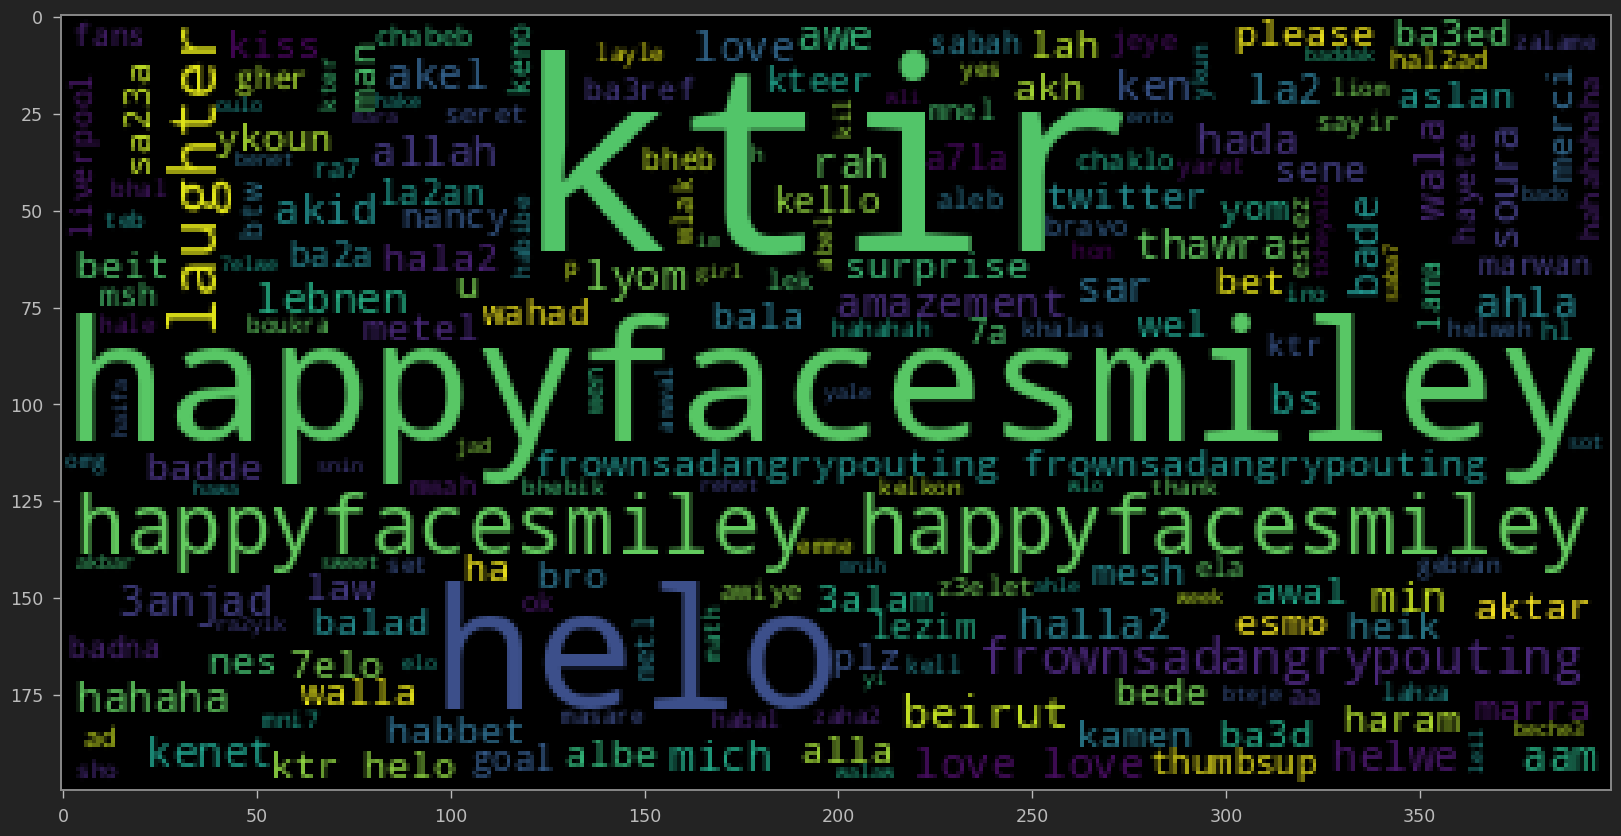

In [100]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

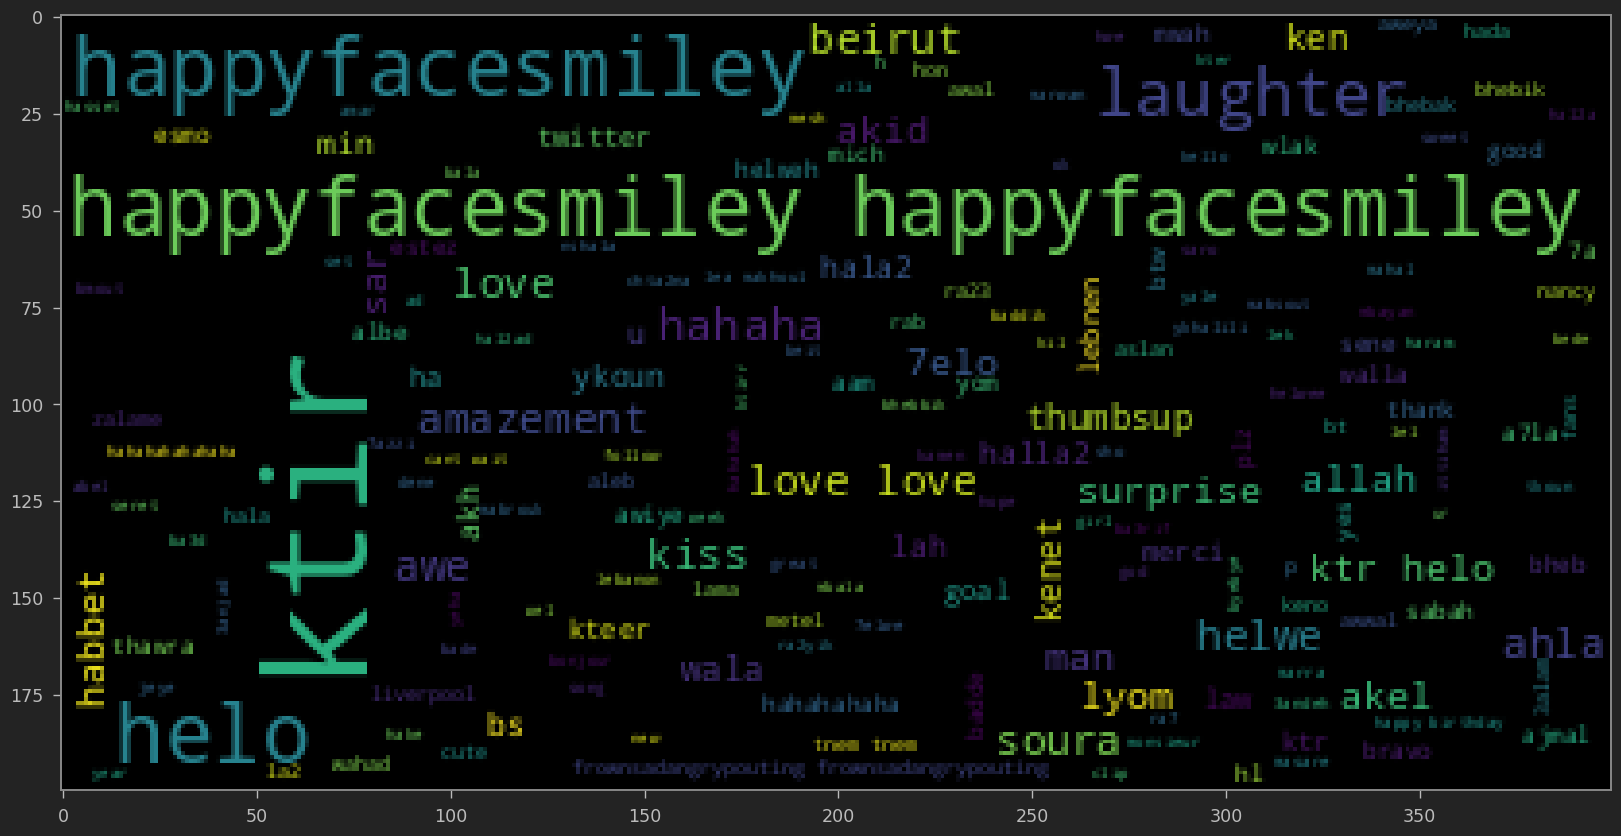

In [101]:
pos_sentences = positive['tweet'].tolist()
pos_sentences_as_one_string =" ".join(pos_sentences)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(pos_sentences_as_one_string))

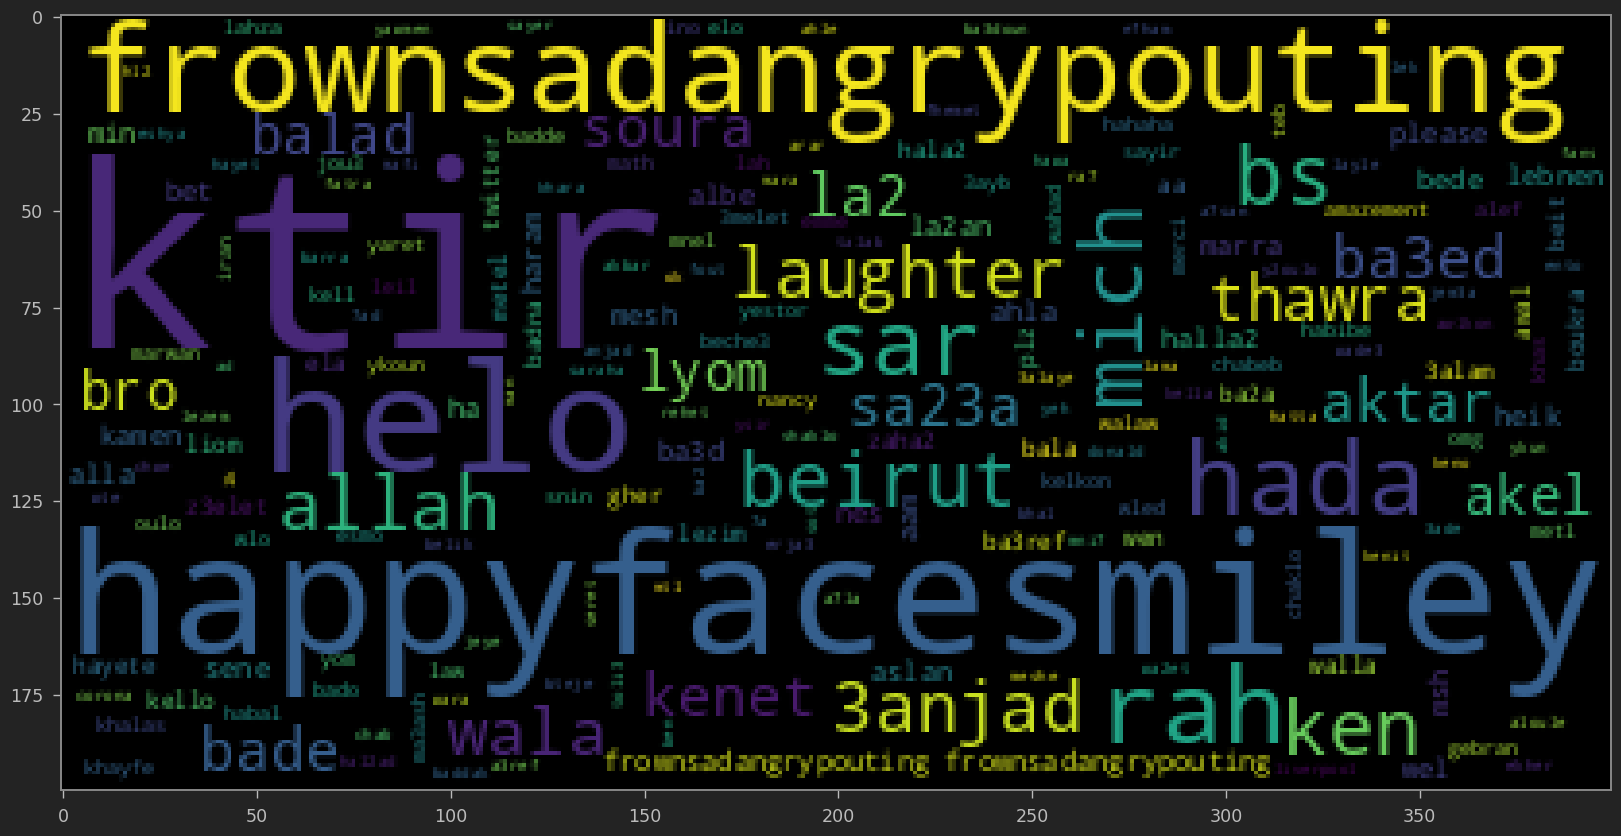

In [102]:
neg_sentences = negative['tweet'].tolist()
neg_sentences_as_one_string =" ".join(neg_sentences)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(neg_sentences_as_one_string))

# Perform vectorization

In [103]:
df['tweet'] = df['tweet'].apply(tweet_cleaning)

In [159]:
# split the data into 80-20 train-test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['tweet'], df['class'], test_size=0.2, random_state=1, stratify=df['class'])
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1, stratify=y_train)

In [160]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer( num_words = 3200, oov_token='<UNK>')

tokenizer.fit_on_texts(X_train)

print(tokenizer.texts_to_sequences(X_train[0]))

[[1], [137], [1], [1], [], [1], [1], [1], [1], [1], [1], [1], [1], [1], [], [1], [1], [1], [158], [], [1], [1], [158], [], [1], [1], [1], [1], [], [1], [1], [1], [], [1], [1], [1], [1], [1], [], [1], [1], [1], [1], [1], [], [1], [1], [1], [1], [1], [1], [1], [], [1], [1], [1], [1], [], [1], [1], [1], [1], [1], [1], [], [1], [1], [1], [1], [], [1], [1], [1], [1], [], [1], [1], [1], [1], [1], [], [1], [1], [1], [1], [1], [1], [], [1], [1], [1], [1], [1]]


In [161]:
print(tokenizer.texts_to_sequences(X_test[264]))

[[1], [1], [1], [1], [1], [1], [], [1], [1], [1], [1], [1], [1], [1], [1], [], [1], [1], [1], [1], [], [1], [1], [1], [1], [1], [], [1], [1], [137], [1], [1], [1], [1], [1], [], [1], [1], [1], [1], [1], [], [137], [1], [158], [158], [1], [1111], [1], [1], [1], [1], [1], [1], [1], [1], [1]]


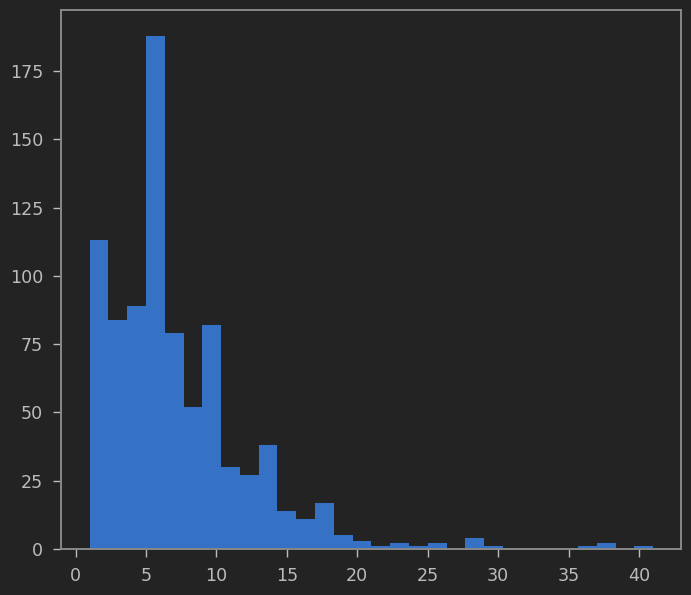

In [162]:
lengths = [len(t.split(' ')) for t in X_train]

plt.hist(lengths, bins=len(set(lengths)))
plt.show()

In [163]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [164]:
def get_sequences(tokenizer, tweets):
    sequences = tokenizer.texts_to_sequences(tweets)
    padded_sequences = pad_sequences(sequences, truncating='post', maxlen=20, padding='post')
    return padded_sequences

In [165]:
padded_train_sequences = get_sequences(tokenizer, X_train)

In [166]:
padded_train_sequences[0]

array([307, 178, 690,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0], dtype=int32)

# Training the Model

In [167]:
%matplotlib inline

import tensorflow as tf
import matplotlib.pyplot as plt



def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()



In [168]:


model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(3200, 16, input_length=20),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(400, return_sequences=True)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 20, 16)            51200     
                                                                 
 dropout_5 (Dropout)         (None, 20, 16)            0         
                                                                 
 bidirectional_6 (Bidirecti  (None, 20, 800)           1334400   
 onal)                                                           
                                                                 
 dropout_6 (Dropout)         (None, 20, 800)           0         
                                                                 
 bidirectional_7 (Bidirecti  (None, 400)               1601600   
 onal)                                                           
                                                                 
 dropout_7 (Dropout)         (None, 400)              

## Training the Model

1. Preparing a validation set
2. Training the model

In [169]:
val_sequences = get_sequences(tokenizer, X_val)

In [170]:
val_sequences[0]

array([ 13,   1, 577,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0], dtype=int32)

In [172]:
h = model.fit(
    padded_train_sequences, y_train,
    validation_data=(val_sequences, y_val),
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)
    ]
)

Epoch 1/100
27/27 [==============================] - 4s 136ms/step - loss: 0.4412 - accuracy: 0.8229 - val_loss: 0.7294 - val_accuracy: 0.6632
Epoch 2/100
27/27 [==============================] - 1s 53ms/step - loss: 0.2121 - accuracy: 0.9233 - val_loss: 0.7526 - val_accuracy: 0.6737
Epoch 3/100
27/27 [==============================] - 2s 69ms/step - loss: 0.1162 - accuracy: 0.9693 - val_loss: 0.9449 - val_accuracy: 0.6316
Epoch 4/100
27/27 [==============================] - 1s 36ms/step - loss: 0.2034 - accuracy: 0.9362 - val_loss: 0.7299 - val_accuracy: 0.6737
Epoch 5/100
27/27 [==============================] - 1s 24ms/step - loss: 0.0665 - accuracy: 0.9823 - val_loss: 0.9390 - val_accuracy: 0.6947
Epoch 6/100
27/27 [==============================] - 1s 37ms/step - loss: 0.0411 - accuracy: 0.9894 - val_loss: 1.7766 - val_accuracy: 0.6842
Epoch 7/100
27/27 [==============================] - 1s 23ms/step - loss: 0.0441 - accuracy: 0.9858 - val_loss: 0.8534 - val_accuracy: 0.6947
Epoch

## Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

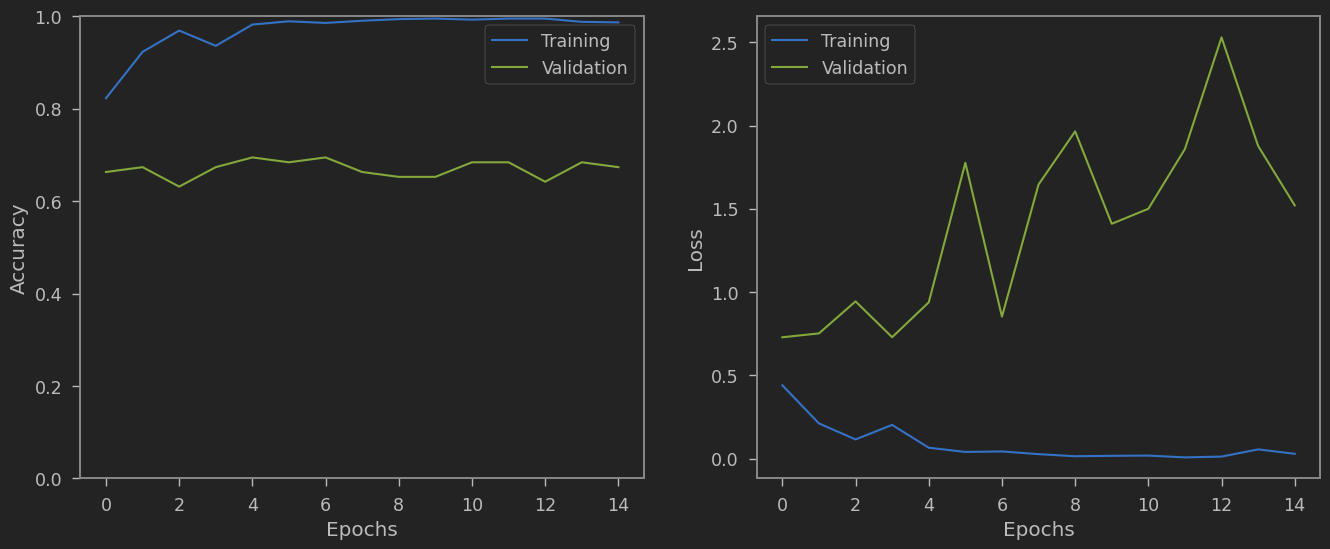

In [173]:
show_history(h)

In [174]:
test_sequences = get_sequences(tokenizer, X_test)
_ = model.evaluate(test_sequences, y_test)

8/8 [==============================] - 0s 11ms/step - loss: 1.4295 - accuracy: 0.6864


In [175]:
preds = model.predict(test_sequences)
preds_classes=np.argmax(preds,axis=1)
preds.shape, y_test.shape

8/8 [==============================] - 2s 9ms/step


((236, 1), (236,))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       119
           1       0.00      0.00      0.00       117

    accuracy                           0.50       236
   macro avg       0.25      0.50      0.34       236
weighted avg       0.25      0.50      0.34       236



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


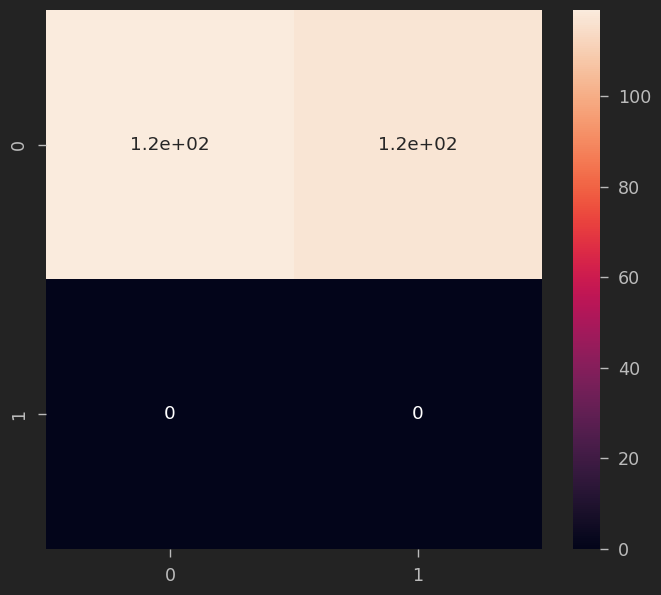

In [176]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(preds_classes, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, preds_classes))